<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/CSNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers  import Conv2D
from tensorflow.keras.models import Sequential
import math
import numpy as np
from keras import backend as K



Using TensorFlow backend.


In [3]:
w = 28
h = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, h, w)
    x_test = x_test.reshape(x_test.shape[0], 1, h, w)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], h, w, 1)
    x_test = x_test.reshape(x_test.shape[0], h, w, 1)

input_shape = (h, w, 1)
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
M_over_N = 0.1
B = 7
l = 1
n_B = M_over_N * l * B**2 #5
n_B = math.ceil(n_B)
print (n_B)

model = Sequential()
model.add(Conv2D(n_B, kernel_size = (B,B), strides=(B,B), activation=None, use_bias=False, input_shape=(28,28,1)))
model.add(Conv2D(l*B**2, kernel_size = (1,1), strides=1, activation=None, use_bias=False))
model.add(tf.compat.v2.keras.layers.Reshape((4,4,7,7,1), input_shape=(int(w/B),int(w/B),l*B**2)))

#model.add(tf.compat.v2.keras.layers.Reshape((h,w,1), input_shape=(int(w/B),int(w/B),l*B**2)))

In [43]:
M_over_N = 0.2
w = 28
h = 28
B = 14
l = 1
n_B = M_over_N * l * B**2 #5
n_B = math.ceil(n_B)
print (n_B)

model = Sequential()
model.add(Conv2D(n_B, kernel_size = (B,B), strides=(B,B), activation=None, use_bias=False, input_shape=(28,28,1)))
model.add(Conv2D(l*B**2, kernel_size = (1,1), strides=1, activation=None, use_bias=False))
model.add(tf.compat.v2.keras.layers.Reshape((2,2,14,14,1), input_shape=(int(w/B),int(w/B),l*B**2)))
model.add(tf.compat.v2.keras.layers.Permute(dims = (1,3,2,4,5), input_shape=(2,2,14,14,1)))
model.add(tf.compat.v2.keras.layers.Reshape((28,28,1), input_shape=(2,14,2,14,1)))

40


In [0]:
M_over_N = 0.9
w = 28
h = 28
B = 14
l = 1
n_B = M_over_N * l * B**2 #5
n_B = math.ceil(n_B)
print (n_B)

model = Sequential()
model.add(Conv2D(n_B, kernel_size = (B,B), strides=(B,B), activation=None, use_bias=False, input_shape=(28,28,1)))
model.add(Conv2D(l*B**2, kernel_size = (1,1), strides=1, activation=None, use_bias=False))
model.add(tf.compat.v2.keras.layers.Reshape((2,2,14,14,1), input_shape=(int(w/B),int(w/B),l*B**2)))

177


In [0]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [0]:
def tile_images_7(images):
  #print(images.shape)
  N = images.shape[0]
  tiled = np.zeros((N,4,4,7,7,1))
  for k, img in enumerate(images):
    for i in range (4):
      for j in range (4):
        tiled[k,i,j,:,:] = img[i*7:(i+1)*7, j*7:(j+1)*7,:]
  return tiled

tiled_x_train = tile_images(x_train[0:2,:,:])
print(tiled_x_train.shape)

(2, 28, 28, 1)
(2, 4, 4, 7, 7, 1)


In [0]:
def tile_images_14(images):
  #print(images.shape)
  N = images.shape[0]
  tiled = np.zeros((N,2,2,14,14,1))
  for k, img in enumerate(images):
    for i in range (2):
      for j in range (2):
        tiled[k,i,j,:,:] = img[i*14:(i+1)*14, j*14:(j+1)*14,:]
  return tiled

tiled_x_train = tile_images_14(x_train[0:2,:,:])
print(tiled_x_train.shape)

(2, 2, 2, 14, 14, 1)


In [0]:
def plot_tiled_7(tiled_x_train):
  plt.figure(figsize=(4,4))
  for i in range(4):
    for j in range(4):
      plt.subplot(4,4,i*4+j+1)
      plt.subplots_adjust( wspace=0, hspace=0)
      plt.imshow(tiled_x_train[i,j,:,:,0])
  plt.show()

In [0]:
def plot_tiled_14(tiled_x_train):
  plt.figure(figsize=(2,2))
  for i in range(2):
    for j in range(2):
      plt.subplot(2,2,i*2+j+1)
      plt.subplots_adjust( wspace=0, hspace=0)
      plt.imshow(tiled_x_train[i,j,:,:,0])
  plt.show()

In [0]:
tiled_x_train = tile_images_14(x_train[:,:,:])
print(tiled_x_train.shape)

(60000, 2, 2, 14, 14, 1)


In [27]:
model.fit(x_train[:,:,:,:], tiled_x_train[:,:,:,:], epochs=6, batch_size = 128,  verbose=1)

NameError: ignored

In [45]:
model.fit(x_train[:,:,:,:], x_train[:,:,:,:], epochs=10, batch_size = 128,  verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0202 - acc: 0.8135
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0096 - acc: 0.8152
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0093 - acc: 0.8152
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0092 - acc: 0.8152
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0092 - acc: 0.8152
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0092 - acc: 0.8152
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0092 - acc: 0.8152
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0092 - acc: 0.8152
Epoch 9/10
45184/60000 [=====================>........] - ETA: 0s - loss: 0.0092 - acc: 0.8154

KeyboardInterrupt: ignored

In [0]:
for layer in model.layers:
    print(layer.output_shape)

(None, 4, 4, 5)
(None, 4, 4, 49)
(None, 4, 4, 7, 7)


In [0]:
import matplotlib.pyplot as plt

r = model.predict(x_test[0:10])

In [0]:
def plot(x):
  plt.imshow(x[:,:,0])
  plt.show()

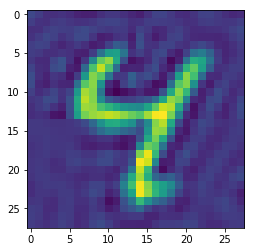

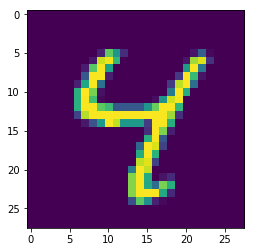

In [52]:
# M/N = 0.05
img_idx = 6
plot(r[img_idx])
fig = plt.figure()
plt.imshow(x_test[img_idx,:,:,0])


In [14]:
# M/N = 0.1
img_idx = 7
plot_tiled_14(r[img_idx])
fig = plt.figure()
plt.imshow(x_test[img_idx,:,:,0])

NameError: ignored

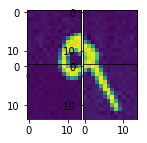

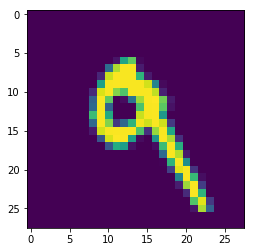

In [0]:
# M/N = 0.9
img_idx = 7
plot_tiled_14(r[img_idx])
fig = plt.figure()
plt.imshow(x_test[img_idx,:,:,0])